# 5a Grafische Datenanalyse

<div class="alert alert-info"> Die <b>Visualisierung</b> der Daten kann dabei helfen Informationen aus Daten zu generieren. In diesem Kapitel beschäftigen wir uns mit unterschiedlichen Darstellungstypen und lernen diese in Python umzusetzen. <br>
Zur Visualisierung stehen unterschiedliche Bibliotheken zur Verfügung. Die gängigste Bibliothek <i>matplotlib</i> markiert den Standard in Python. Neben dieser, machen wir uns auch mit der Bibliothek <i>seaborn</i> vertraut. Diese baut auf <i>matplotlib</i> auf, vereinfacht jedoch die Anwendung und bietet zusätzliche Möglichkeiten der Darstellung.<br>
    <ol>
        <li> Visualisierung in Python</li>
        <li> Visualisierungen einer Variable </li>
        <li> Visualisierung bivariater Daten </li>
    </ol>

Nach dieser Lerneinheit können Sie den Aufbau von <i>matplotlib</i> und <i>seaborn</i> wiedergeben. Sie können kategorische und numerische Variablen visualisieren und zeitliche Prozesse darstellen.</div>

Pakete, die noch installiert werden müssen: 
* matplotlib
* statsmodels

## 1 Visualisierungen in Python

In Python lassen sich zahlreiche Plots implementieren. Dabei ist es entscheidend, den richtigen Plot für die richtigen Daten auszuwählen. Zunächst müssen wir uns fragen, um welchen Datentyp es sich handelt: 
* Kategoriell
* Numerisch
* Numerisch & Kategorisch
* Räumliche Daten
* Netzwerkdaten
* Zeitreihendaten <br>

Außerdem müssen wir uns die Frage stellen, ob es sich um eine Variable, zwei Variablen oder mehrere Variablen handelt.<br>

Auf der Website https://www.data-to-viz.com/index.html finden Sie unterschiedliche Visualisierungstechniken nach Datentyp kategorisiert: 
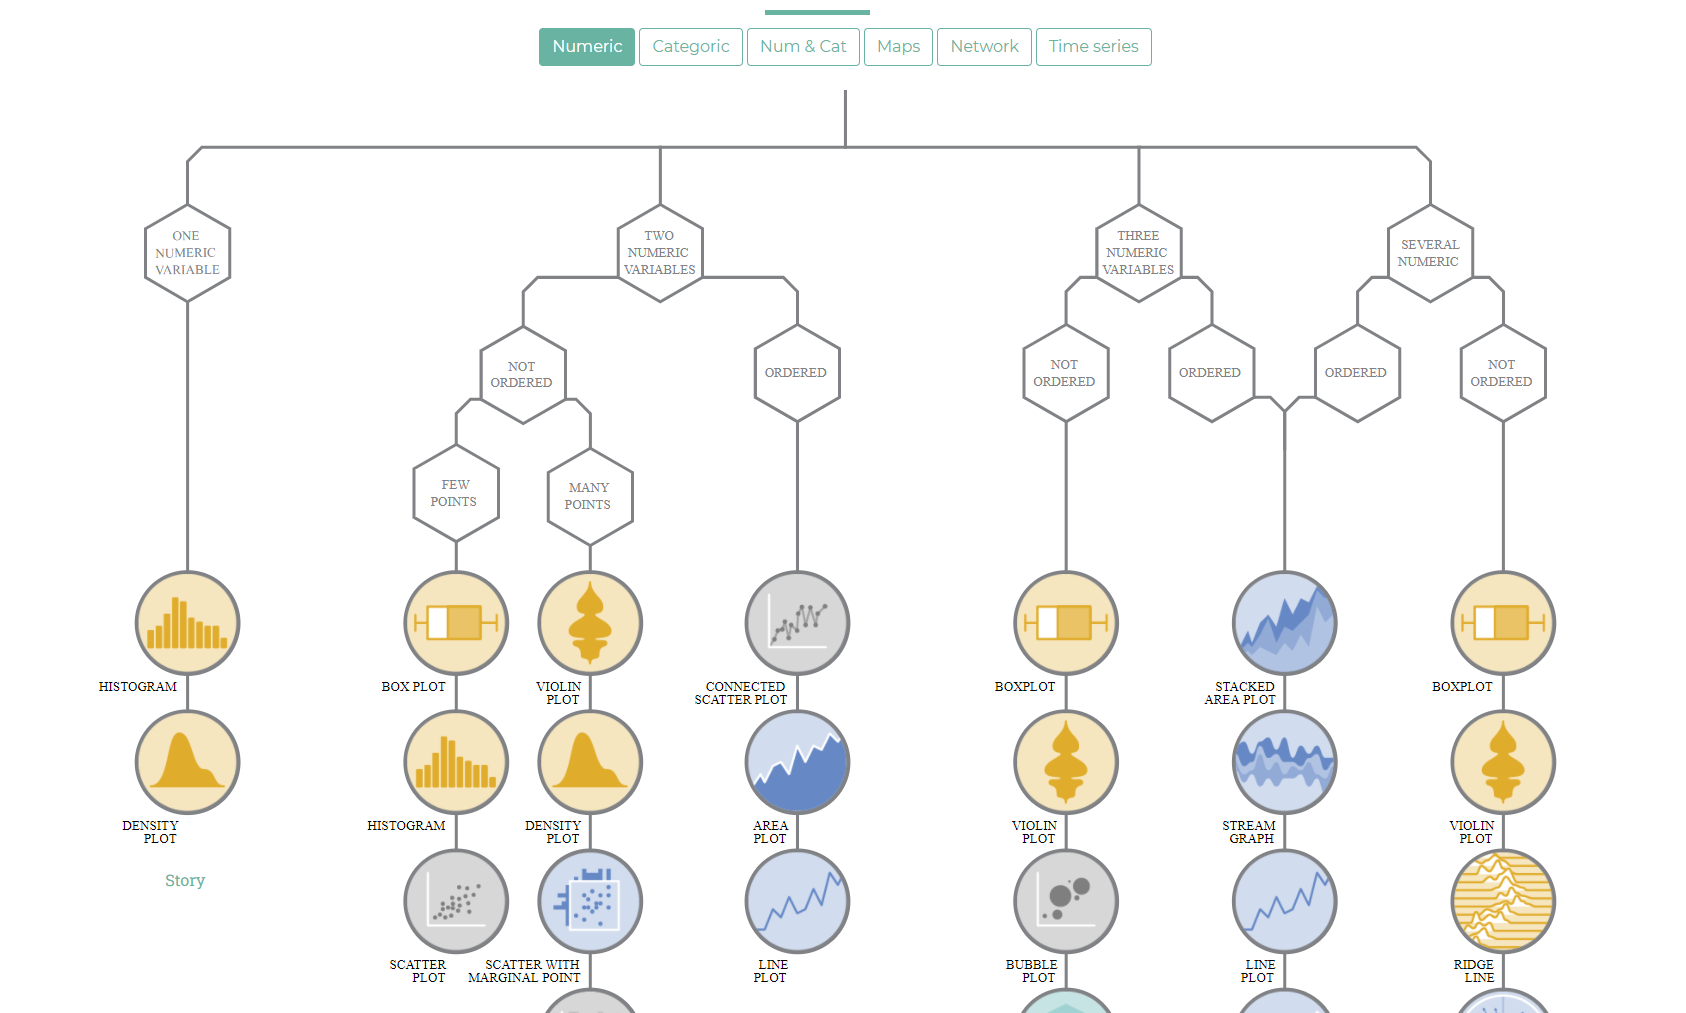

### 1.1 Erste Grafik erstellen

In [ ]:
# Bibliotheken laden
import csv
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt # auch Konvention
import seaborn as sns

In [ ]:
y = [1, 4, 2, 3]
plt.plot(y)
plt.show()

**Auswahl: High-Level Parameter**:

| Argument   | Wert                            | Beschreibung                            |
|:------------|:---------------------------------|:-----------------------------------------|
| linestyle | "--", "-.", "", ...             | Linientyp                               |
| marker     | "o", "v", "1", ...              | Art der Datenpunktsymbole               |
| color      | "Farbname", "RGB", "Hex-Code" | Farbe der Datenmarkierung               |
| linewidth  | Zahl                          | Linienstärke |
| label      | "Legendenbeschriftung"        | Legendenbeschriftung                    |

In [ ]:
x = [0, 3, 4, 5]
plt.plot(x, y, color="green", marker="o", linestyle="--")
plt.show()

**Auswahl Low-Level-Funktionen**:

| Funktionen                                                                          | Beschreibung                       |
|:---------------------------------------------------------------------------------|:------------------------------------|
| plt.title("Text")                                                             | Fügt Überschrift hinzu             |
| plt.xlabel("Text")                                                            | Fügt x-Achsenbeschriftung hinzu    |
| plt.ylabel("Text")                                                            | Fügt y-Achsenbeschriftung hinzu    |
| plt.legend(loc="Ort", fontsize=Zahl, ...)                                   | Eigenschaften der Legende          |
| plt.grid(b=bool, ...)                                                         | Eigenschaften der Gitternetzlinien |
| plt.axis(xmin=Zahl, xmax=Zahl, ymin=Zahl, ymax=Zahl, option=bool,...) | Achseneigenschaften                |
| plt.axvline()                                                         | Vertikale Linie                   |
| plt.axhline()                                                         | Horizontale Linie                   |

In [ ]:
# Plot
plt.plot(x, y, label="min.Temp")

# Generelles Layout
plt.title("Grafik1 $\sim N(\mu, \sigma^2)$", loc="left", fontsize=20)
plt.xlabel("Tage", style="italic")
plt.ylabel("Temperatur", color="red")
plt.xlim([1,9])
plt.ylim([0,5])
plt.legend(loc = "upper right")

# Plot anzeigen
plt.show()

In [ ]:
# Plot
plt.plot(x, y)

# Generelles Layout
plt.axvline(1, label="Vertikale Linie", color="red")
plt.axhline(3, label="Horizontale Linie", color="blue")

plt.legend()

# Plot anzeigen
plt.show()

### 1.2 Mehrere Grafiken

Die beiden oben visualisierten Plots lassen sich auch in einem Koordinatensystem darstellen:

In [ ]:
# 2 Linien in einer Grafik
plt.plot(y, color="red")
plt.plot(x, y, color="green")
plt.show()

Um mehrere Grafiken in einem Fenster (aber mehreren Koordinatensystemen) darzustellen, wird der Befehl `subplots()` verwendet. In diesen werden zwei Zahlen angegeben, welche die Positionen der Subplots festlegt:
* Erste Zahl: Anzahl an Zeilen
* Zweite Zahl: Anzahl an Spalten

In [ ]:
fig, axs = plt.subplots(2,1)
plt.suptitle("2 Grafiken in einem Fenster")
axs[0].plot(y, color = "red")
axs[1].plot(x, y, color = "green")
plt.show()

In [ ]:
fig, axs = plt.subplots(2,2)
plt.suptitle("4 Grafiken in einem Fenster")
axs[0,0].plot(y, color = "red")
axs[0,1].plot(x, y, color = "green")
axs[1,0].plot(x, color = "blue")
axs[1,1].plot(x, color = "yellow")
plt.show()

### 1.3 Speichern von Grafiken

Plots können einfach mit `plt.savefig()` oder `plt.imsave` gespeichert werden. Der anzugebende Pfade ist dabei relativ zum aktuellen Verzeichnis.

In [ ]:
plt.plot(y)
plt.title("Speichern")
plt.savefig("plot1.png")

Analog können die Plots in anderen Formaten wie `png`, `jpg`, `svg`, `pdf` usw. abgespeichert werden.

In [ ]:
plt.plot(y)
plt.title("Speichern")
plt.savefig("plot1.jpg")

In [ ]:
plt.plot(y)
plt.title("Speichern")
plt.savefig("plot2.jpg", dpi=300, bbox_inches="tight") 

## 2 Visualisierung einer Variable

Um sich mit der Verteilung der Beobachtungen vertraut zu machen und einen Eindruck von der Datenqualität zu bekommen, kann es sinnvoll sein die interessierende Variable zu visualisieren. Dabei ist das Skalenniveau des Merkmals zu beachten. 

In [ ]:
# Datensatz importieren
df = pd.read_csv("..\_Daten\Bestsellers.csv")
df.head()

### 2.1 Kategorielles Merkmal

Mögliche Fragestellungen:
* Wie hoch sind die absoluten / relativen Häufigkeiten?
* Sind Kategorien ähnlich häufig?
* Welche Kategorien sind am häufigsten / seltensten?
* Gibt es ein Muster bei der Häufigkeitsverteilung?
* ... <br>

Darstellungsmöglichkeiten: Säulendiagramm, Kreisdiagramm ...

#### Säulendiagramm
Über jeder Ausprägung werden die zugehörigen relativen (absoluten) Häufigkeiten in Form von Säulen aufgetragen. Die Darstellung mittels Säulendiagrammen ist geeignet für diskrete Merkmale, die nicht allzu viele verschiedene Ausprägungen besitzen (vgl. Skript Statistik 1 Folie 21).

In [ ]:
# absolute Häufigkeiten
data4bar = df["Genre"].value_counts()
data4bar

In [ ]:
# Mittels matplotlib
# Balken
plt.bar(data4bar.index, data4bar.values)

# Generelles Layout
plt.title("Säulendiagramm")
plt.xlabel("Genre")
plt.ylabel("Anzahl")

# Plot anzeigen
plt.show()

In [ ]:
# rel. Häufigkeiten
plt.bar(data4bar.index, data4bar.values/len(df))
plt.show()

In [ ]:
# Horizontal
plt.barh(data4bar.index, data4bar.values)
plt.show()

In [ ]:
# Farbe ändern mit RGBA
plt.bar(data4bar.index, data4bar.values, color=(0.2, 0.4, 0.6, 0.2)) # Rot, Grün, Blau, Transparenz
plt.show()

In [ ]:
# Farbe der einzelnen Säulen ändern
plt.bar(data4bar.index, data4bar.values, color=["Red", "Yellow"])
plt.show()

In [ ]:
# Farbe Umriss
plt.bar(data4bar.index, data4bar.values, color=(0.2, 0.4, 0.6, 0.2), edgecolor = "red")
plt.show()

In [ ]:
# Mittels seaborn
sns.barplot(x = data4bar.index, y = data4bar.values, color="#69b3a2")
plt.show()

In [ ]:
# Style und Größe der Grafik
plt.figure(figsize=(10,7))
sns.set(style="darkgrid") # Alternativ: whitegrid, white, ...
sns.barplot(x = data4bar.index, y = data4bar.values, color="#69b3a2")
plt.show()

#### Kreissektorendiagramm
Beim Kreissektorendiagramm ist die Fläche proportional zu den Häufigkeiten der jeweiligen Ausprägung (vgl. Statistik 1 Skript Folie 25).

In [ ]:
plt.pie(data4bar.values, labels=data4bar.index)
plt.show()

### 2.2 Stetiges Merkmal

Mögliche Fragestellungen:
* Gibt es Ausreißer oder fehlerhafte Werte?
* Sind die Daten symmetrisch verteilt?
* Gibt es Häufungen oder Lücken in den Daten?
* Folgen die Daten in etwa einer bekannten Verteilung (z. B. Normalverteilung)?
* ... <br>

Darstellungsmöglichkeiten: Histogramm, Boxplot, QQ-Plot, Dichteschätzer, emp. Verteilungsfunktion, Lorenzkurve, ...

In [ ]:
df["Reviews"].describe()

**Histogramm**: <br>Die Flächen der Säulen sind proportional zu den Häufigkeiten der klassierten Ausprägungen eines stetigen Merkmals. Die Höhe der Säulen ist gegeben durch: <br>
<br>
$\hat f(x)= \frac{\text{relative Klassenhäufigkeit}}{\text{Klassenbreite}}$<br>

In [ ]:
plt.hist(df["Reviews"], density = True)
plt.show()

**Boxplot**:<br>
Darstellung der wichtigsten Lage- und Streuungsmaße eines metrischen Merkmals. Sind besonders geeignet für die Identifikation von Ausreißern.

* Linie in der Mitte: Median
* Unterer und oberer Rand der Box: Unteres und oberes Quartil
* Einzelpunkt: Ausreißer
* Untere und obere Linie (= Whiskers): Kleinster und größter Wert, der kein Ausreißer ist

In [ ]:
sns.boxplot(x=df["Reviews"])
plt.show()

**Dichteschätzer**:<br>
Darstellung der Schätzung $\hat f(x)$ der Dichtefunktion $f(x)$.

**Hinweis:** FutureWarning einfach ignorieren :) 

In [ ]:
sns.kdeplot(df["Reviews"])
plt.show()

In [ ]:
sns.kdeplot(df["Reviews"], fill=True)
plt.show()

In [ ]:
sns.kdeplot(df["Reviews"], fill=True, color="olive")
plt.show()

**QQ-Plot**:<br>
Vergleich der Quantile der beobachteten Häufigkeitsverteilung mit den entsprechenden Quantilen der Standardnormalverteilung. Liegen die Punkte auf einer Diagonalen, so stimmen die empirischen und die theoretischen Quantile überein.

In [ ]:
import statsmodels.api as sm

In [ ]:
sm.qqplot(df["Price"], line="q")
plt.title("Normal QQ-Plot")
plt.show()

## 5a.3 Visualisierung bivariater Daten

Die Visualisierung von bivariaten Daten dient dazu, zu prüfen, ob es einen Zusammenhang zwischen zwei Variablen gibt und wenn ja, was für ein Zusammenhang vorliegen könnte.

### 5a.3.1 Zwei stetige Merkmale
Mögliche Fragestellungen:
* Besteht ein Zusammenhang oder Abhängigkeiten zwischen den Daten?
* Gibt es Ausreißer? &rarr; Beobachtungen können im Zweidimensionalen Ausreißer sein, ohne Ausreißer im Eindimensionalen zu sein
* Gibt es Cluster?
* Gibt es zweidimensionale Grenzen?
* Wo häufen sich die Daten und in welchen Bereich gibt es weniger Beobachtungen?

**Streudiagramm**:<br>
Darstellung der Beobachtungen zweier metrischer Merkmale im $(x, y)$-Koordinatensystem.

In [ ]:
# Scatterplot
plt.plot(df["Reviews"], df["Price"], marker="o", linestyle="")

# Generelles Layout
plt.title("Scatterplot")
plt.xlabel("User Rating")
plt.ylabel("Price")

# Plot anzeigen
plt.show()

**Achtung**: Um Overplotting zu vermeiden, ist sog. Alphablending hilfreich.

In [ ]:
# Scatterplot
plt.plot(df["Reviews"], df["Price"], marker="o", alpha=0.2, linestyle="")

# Generelles Layout
plt.title("Scatterplot")
plt.xlabel("User Rating")
plt.ylabel("Price")

# Plot anzeigen
plt.show()

### 5a.3.2 Ein stetiges und ein kategorielles Merkmal

Mögliche Fragestellungen:
* Unterscheiden sich die Mittelwerte eines Merkmals zwischen zwei Gruppen?
* Wie verändert sich die Verteilung eines stetigen Merkmals über die Kategorien eines kategoriellen Merkmals?
* Welcher Zusammenhang besteht zwischen einem stetigen und einem kategoriellen Merkmal?

**Parallele Boxplots**:<br>
Daten eines metrischen Merkmals werden entsprechend eines kategoriellen Merkmals in Gruppen eingeteilt und jeweils in einem Boxplot dargestellt.

In [ ]:
sns.boxplot(y=df["Reviews"], x=df["Genre"])
plt.show()

### 5a.3.3 Zwei kategorielle Merkmale

Mögliche Fragestellungen:
* Ist die Verteilung von Häufigektien in verschiedenen Gruppen gleich?
* Sind zwei kategorielle Variablen unabhängig?

In [ ]:
## Wir brauchen eine neue kategorielle Variable: Bewertung - gut, sehr gut
df.at[:, "Bewertung"] = df.loc[:,"User Rating"].apply(lambda i: "gut" if i < 4.7 else "sehr gut")
df["Bewertung"].value_counts()

In [ ]:
data4bar = pd.crosstab(index = df.Genre, columns=df.Bewertung)
data4bar # pd dataframe

**Gestapeltes und gruppiertes Säulendiagramm**:<br>
Die Höhen der Säulen entsprechen den gemeinsamen absoluten Häufigkeiten der Ausprägungen zweier kategorialer Merkmale.

In [ ]:
r = [0, 1] # Position auf der x-Achse

# Balken
plt.bar(r, data4bar.gut.values, color="#2d7f5e", edgecolor="white", label="gut")
plt.bar(r, data4bar["sehr gut"].values, bottom=data4bar.gut.values, color="#557f2d", edgecolor="white", label="sehr gut")

plt.xticks(r, ["Fiction", "Non Fiction"]) # X-Achse
# Generelles Layout
plt.ylabel("Anzahl")
plt.xlabel("Genre")
plt.legend() # Legende anzeien
plt.show() # Plot anzeigen

In [ ]:
balkenBreite = 0.4

# Position auf der x-Achse
r1 = [0,1] # gut
r2 = [x + balkenBreite for x in r1] # sehr gut

# Balken
plt.bar(r1, data4bar.gut.values, width = balkenBreite, color="#2d7f5e", edgecolor="white", label="gut")
plt.bar(r2, data4bar["sehr gut"].values, width = balkenBreite, color="#557f2d", edgecolor="white", label="sehr gut")
# Generelles Layout
plt.xticks(r, ["Fiction", "Non Fiction"])
plt.ylabel("Anzahl")
plt.xlabel("Genre")
plt.legend()
plt.show() # Plot anzeigen

<div class="alert alert-warning"><h4> Aufgabe 1: Total Profit

a) Importieren Sie den Datensatz **company** aus dem Git-Repo.

b) Erstellen Sie ein Liniendiagramm mit `total_profit` und `month_number`.

c) Nehmen Sie folgende Änderungen an dem Liniendiagramm vor:
* Linienfarbe = grün
* Titel = *Profit per month*
* X-Achsenbeschriftung: *Month*
* y-Achsenbeschriftung: *Profit in US-Dollar*
* Datenpunktsymbol: Dreieck
* Linientyp: -.-.-.-.-.-

d) Kennzeichnen Sie in der Grafik den Mittelwert von `total_profit` mithilfe einer horizontalen, roten Linie. Geben Sie in der Legende an, dass es sich bei der Linie um den Mittelwert handelt.